In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = '../data/synthetic_australian_real_estate.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,rea_property_id,property_type,state,postcode,year_built,last_sold_date,last_sold_agency,bedrooms,bathrooms,findagentsuri,...,parking,listing_type,availability,rent_price,rent_bond_,rent_currency,sold_date,property_history_link,description,agents
0,4322577,Townhouse,NT,4159,1937,2011-02-01,Green Group,2,3,https://baker-brown.net/,...,1,Rent,Sold,929,5407,AUD,2018-11-17,https://hull.net/,Suscipit earum quasi doloribus ad perferendis....,James Zamora
1,1795147,Townhouse,NT,5034,1953,2020-02-04,Cruz LLC,2,1,http://walker.biz/,...,2,Rent,Under Offer,1167,3062,AUD,2022-10-08,http://www.graham.info/,Sed adipisci autem.\nQuasi iste quam sapiente ...,Mary Stephenson
2,2648223,Apartment,NSW,2992,1988,2003-10-02,Escobar Ltd,4,2,http://ramirez.edu/,...,0,Rent,Available,765,5343,AUD,2015-06-30,http://www.collins.org.au/,Amet animi neque eum maiores ut aliquid neque....,Lisa Perez
3,2705182,Apartment,Qld,6897,2002,2018-08-17,Bautista and Sons,4,3,https://www.sawyer.info/,...,1,Sale,Under Offer,802,5078,AUD,2015-02-28,https://www.davis.biz/,Repellendus cum quidem aspernatur voluptate oc...,Teresa Farmer
4,5402063,Unit,Qld,2764,1980,2005-12-25,"Daniel, Jacobs and Jimenez",3,2,http://www.kerr.edu.au/,...,2,Rent,Sold,1406,1557,AUD,2008-10-24,http://www.harris.edu.au/,Voluptatum enim asperiores repellendus maxime ...,Frank Mccormick


In [2]:
# Checking the basic information of the dataset
data.info()

# Checking for any missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rea_property_id             10000 non-null  int64  
 1   property_type               10000 non-null  object 
 2   state                       10000 non-null  object 
 3   postcode                    10000 non-null  int64  
 4   year_built                  10000 non-null  int64  
 5   last_sold_date              10000 non-null  object 
 6   last_sold_agency            10000 non-null  object 
 7   bedrooms                    10000 non-null  int64  
 8   bathrooms                   10000 non-null  int64  
 9   findagentsuri               10000 non-null  object 
 10  floor_area                  10000 non-null  object 
 11  fullsuburb                  10000 non-null  object 
 12  house_type                  10000 non-null  object 
 13  lat                         1000

rea_property_id               0
property_type                 0
state                         0
postcode                      0
year_built                    0
last_sold_date                0
last_sold_agency              0
bedrooms                      0
bathrooms                     0
findagentsuri                 0
floor_area                    0
fullsuburb                    0
house_type                    0
lat                           0
lon                           0
photo_count                   0
images_urls                   0
street_address                0
suburb                        0
url                           0
land_size                     0
sales_history                 0
land_size_num                 0
land_size_unit                0
floor_area_num                0
avm_estimate_lastupdated      0
estimated_price               0
estimated_price_confidence    0
estimated_value               0
estimated_value_high          0
estimated_value_low           0
offmarke

In [3]:
# Displaying summary statistics for numerical columns
data.describe()

,rea_property_id,postcode,year_built,bedrooms,bathrooms,lat,lon,photo_count,land_size_num,floor_area_num,estimated_price,estimated_value,estimated_value_high,estimated_value_low,parking,rent_price,rent_bond_
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,5.515977e+06,5013.526200,1959.967300,3.00030,1.992900,-23.938204,133.487618,10.45670,751.991400,250.352752,1.098753e+06,1.098166e+06,1.589641e+06,1.022636e+06,0.989900,896.721800,3613.08770
std,2.600182e+06,1720.738594,35.031976,1.41651,0.817262,8.051626,11.934734,5.70326,261.609112,86.519702,5.162548e+05,5.159321e+05,8.086394e+05,5.059047e+05,0.812935,346.536811,1378.22063
min,1.001345e+06,2000.000000,1900.000000,1.00000,1.000000,-37.994988,113.002567,1.00000,300.000000,100.028428,2.000340e+05,2.001260e+05,2.004550e+05,1.501390e+05,0.000000,300.000000,1200.00000
25%,3.233270e+06,3532.000000,1930.000000,2.00000,1.000000,-30.909636,123.237721,6.00000,525.750000,175.410890,6.499258e+05,6.540520e+05,8.923802e+05,5.838950e+05,0.000000,596.000000,2436.00000
50%,5.504288e+06,5043.000000,1960.000000,3.00000,2.000000,-23.954002,133.436698,10.00000,755.000000,250.482310,1.095836e+06,1.101122e+06,1.594799e+06,1.022574e+06,1.000000,896.000000,3612.00000
75%,7.803551e+06,6501.250000,1990.000000,4.00000,3.000000,-16.956179,143.846133,15.00000,980.000000,326.196319,1.542816e+06,1.538642e+06,2.284509e+06,1.458797e+06,2.000000,1197.000000,4816.25000
max,9.998016e+06,7999.000000,2021.000000,5.00000,3.000000,-10.000612,153.999357,20.00000,1199.000000,399.974927,1.999950e+06,1.999981e+06,2.999951e+06,1.899854e+06,2.000000,1499.000000,5999.00000


Number of duplicate rows: 0


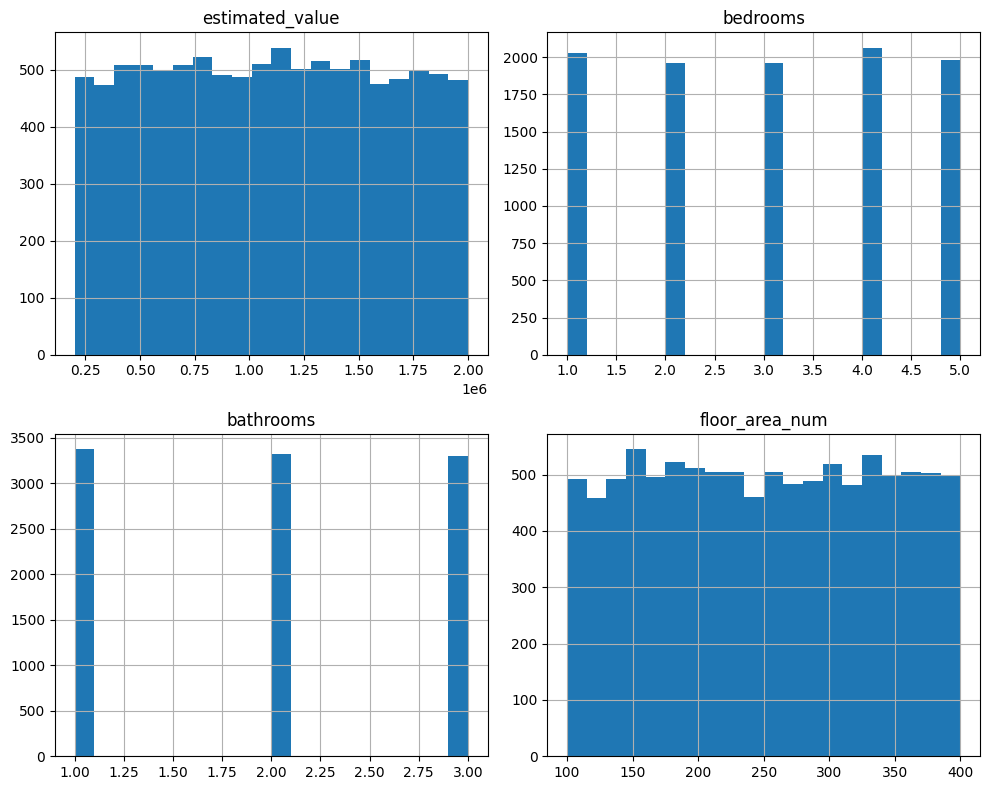

In [6]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Visualizing the distribution of key features such as estimated_value, bedrooms, bathrooms, and floor_area_num
key_columns = ['estimated_value', 'bedrooms', 'bathrooms', 'floor_area_num']  # Adjusted column names
data[key_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [5]:
# Displaying all column names to verify which features are present in the dataset
print("Column Names:", data.columns)


Column Names: Index(['rea_property_id', 'property_type', 'state', 'postcode', 'year_built',
       'last_sold_date', 'last_sold_agency', 'bedrooms', 'bathrooms',
       'findagentsuri', 'floor_area', 'fullsuburb', 'house_type', 'lat', 'lon',
       'photo_count', 'images_urls', 'street_address', 'suburb', 'url',
       'land_size', 'sales_history', 'land_size_num', 'land_size_unit',
       'floor_area_num', 'avm_estimate_lastupdated', 'estimated_price',
       'estimated_price_confidence', 'estimated_value', 'estimated_value_high',
       'estimated_value_low', 'offmarket', 'parking', 'listing_type',
       'availability', 'rent_price', 'rent_bond_', 'rent_currency',
       'sold_date', 'property_history_link', 'description', 'agents'],
      dtype='object')


In [7]:
# Displaying unique values in categorical features to understand their diversity
categorical_columns = ['property_type', 'state', 'house_type', 'suburb', 'listing_type', 'availability']  # Adjust as needed
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print("\n")

Unique values in property_type:
['Townhouse' 'Apartment' 'Unit' 'House']


Unique values in state:
['NT' 'NSW' 'Qld' 'Vic' 'ACT' 'SA' 'Tas' 'WA']


Unique values in house_type:
['Semi-detached' 'Terrace' 'Detached']


Unique values in suburb:
['Livingstonbury' 'St. Anitaville' 'Port Jasonhaven' ... 'Alexton'
 'Wintersside' 'West Josephshire']


Unique values in listing_type:
['Rent' 'Sale']


Unique values in availability:
['Sold' 'Under Offer' 'Available']




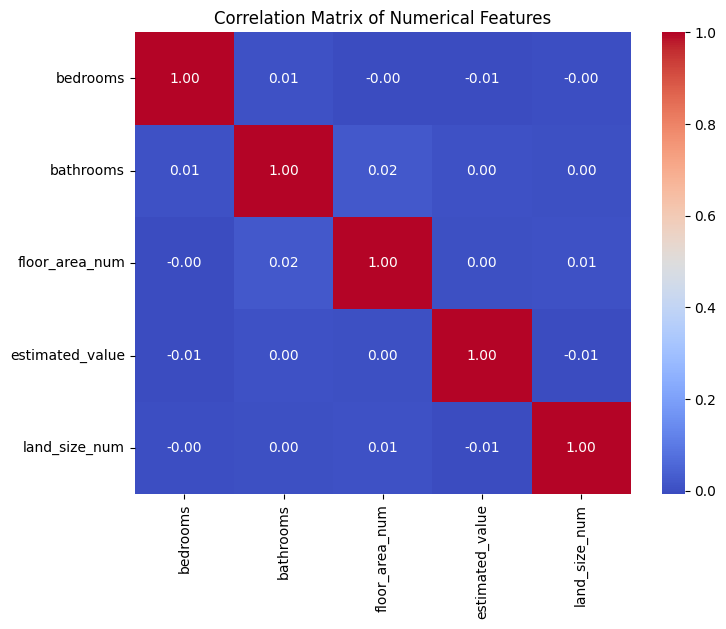

In [8]:
# Computing correlation matrix for numerical features
numeric_columns = ['bedrooms', 'bathrooms', 'floor_area_num', 'estimated_value', 'land_size_num']  # Adjust as necessary
corr_matrix = data[numeric_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Description Length Statistics:
count    10000.000000
mean        18.850500
std          5.006961
min          3.000000
25%         15.000000
50%         19.000000
75%         23.000000
max         33.000000
Name: description_length, dtype: float64


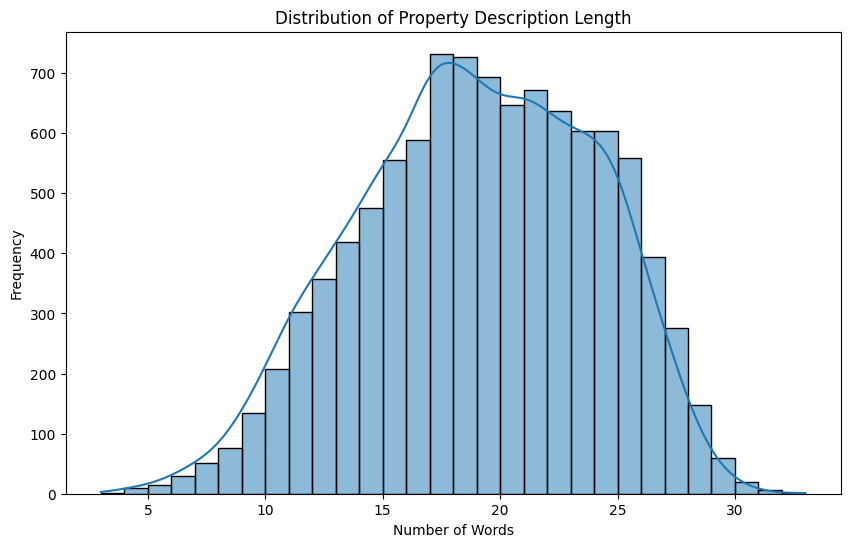

In [9]:
# Checking basic statistics of text length in the description column
data['description_length'] = data['description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
print("Description Length Statistics:")
print(data['description_length'].describe())

# Visualizing distribution of description length
plt.figure(figsize=(10, 6))
sns.histplot(data['description_length'], bins=30, kde=True)
plt.title("Distribution of Property Description Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

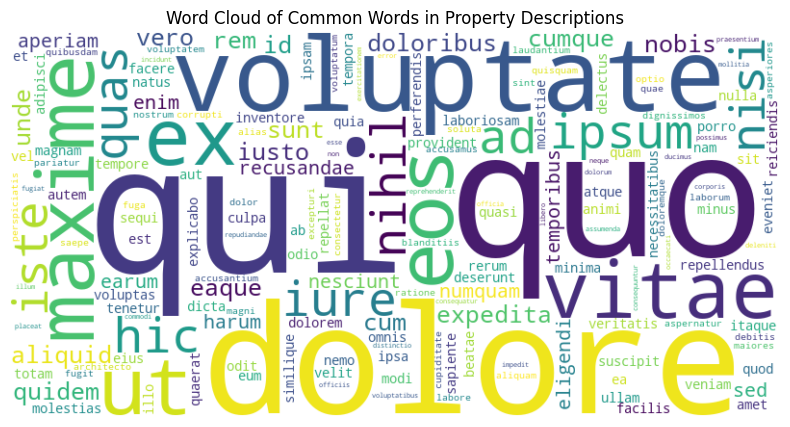

In [12]:
from collections import Counter
import re
from wordcloud import WordCloud

# Concatenating all descriptions and generating a word cloud for common words
all_text = ' '.join(data['description'].dropna().values)
all_text = re.sub(r'[^A-Za-z\s]', '', all_text).lower()  # Removing special characters and converting to lowercase

# Creating word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Common Words in Property Descriptions")
plt.show()

Number of unique values in suburb: 7798
Number of unique values in state: 8
Number of unique values in lat: 10000
Number of unique values in lon: 10000


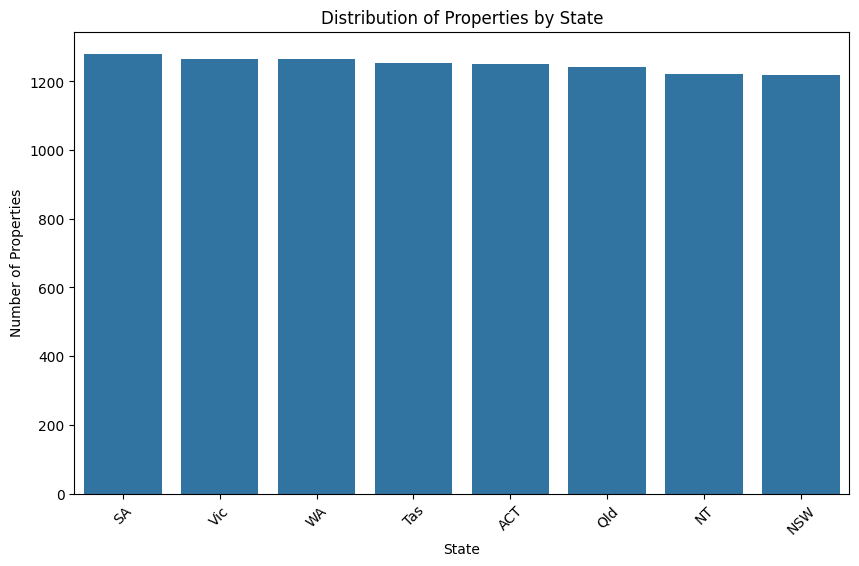

In [13]:
# Checking unique counts of location-related fields to assess geographic diversity
location_columns = ['suburb', 'state', 'lat', 'lon']
for col in location_columns:
    print(f"Number of unique values in {col}: {data[col].nunique()}")

# Displaying the count of properties per state to see distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='state', order=data['state'].value_counts().index)
plt.title("Distribution of Properties by State")
plt.xlabel("State")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.show()

In [16]:
import folium

# Creating a map centered on the median latitude and longitude
map_center = [data['lat'].median(), data['lon'].median()]
property_map = folium.Map(location=map_center, zoom_start=10)

# Adding markers for a sample of properties
sample_data = data[['lat', 'lon', 'suburb']].dropna().sample(100)  # Adjust sample size as needed
for idx, row in sample_data.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['suburb']).add_to(property_map)

# Displaying the map
property_map

Top 20 Suburbs by Average Estimated Value:
suburb
West Angelicaside     1999685.0
Foxmouth              1999464.0
Lesliefurt            1999434.0
Tanyabury             1999414.0
Marksfurt             1999004.0
North Lisaport        1998028.0
West Angelastad       1997326.0
Kristenfort           1996896.0
Port Patrickshire     1996704.0
Adamside              1996260.0
East Jeremy           1995999.0
East Ericview         1995494.0
Santosview            1995182.0
Flemingside           1994968.0
New Nicoleborough     1994750.0
Josephbury            1994506.0
Escobarfort           1994492.0
Harriston             1994319.0
Lake Sarahborough     1994240.0
Port Jordanchester    1993705.0
Name: estimated_value, dtype: float64


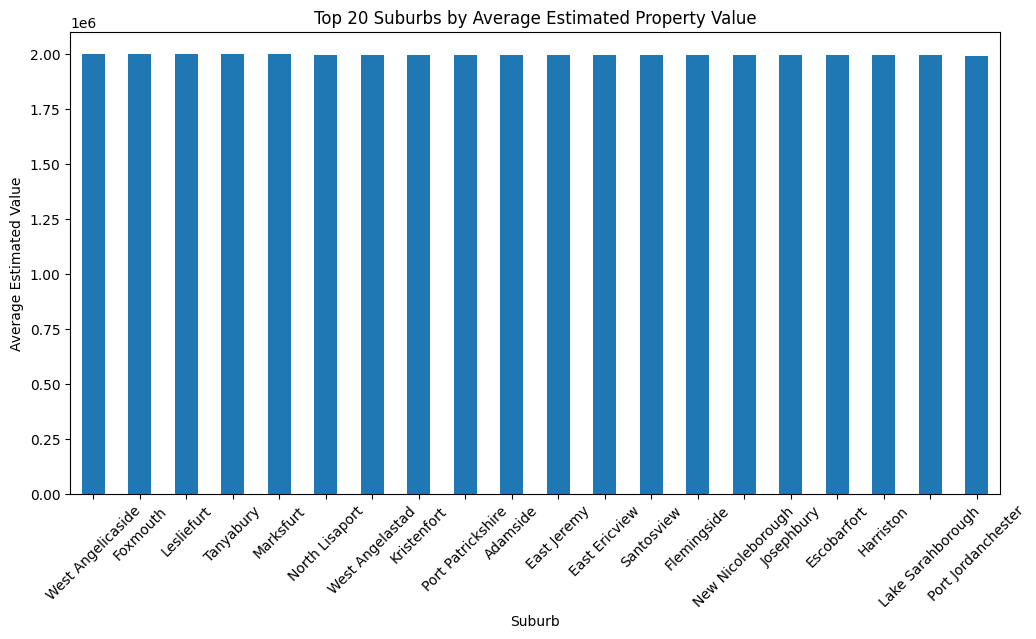

In [17]:
# Checking the average estimated property value by suburb to understand price variation
avg_price_by_suburb = data.groupby('suburb')['estimated_value'].mean().sort_values(ascending=False).head(20)
print("Top 20 Suburbs by Average Estimated Value:")
print(avg_price_by_suburb)

# Visualizing the average estimated value by suburb
plt.figure(figsize=(12, 6))
avg_price_by_suburb.plot(kind='bar')
plt.title("Top 20 Suburbs by Average Estimated Property Value")
plt.xlabel("Suburb")
plt.ylabel("Average Estimated Value")
plt.xticks(rotation=45)
plt.show()

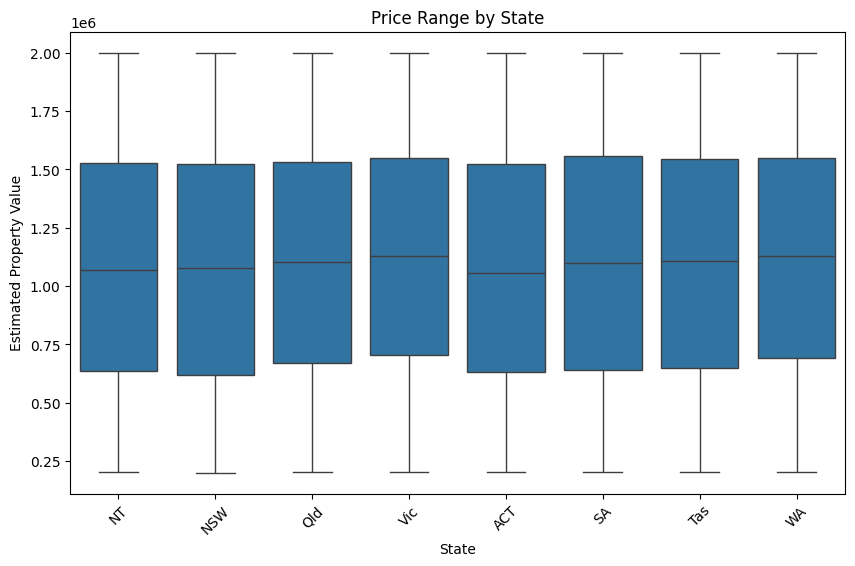

In [18]:
# Analyzing the price range to see the spread of property prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='state', y='estimated_value')
plt.title("Price Range by State")
plt.xlabel("State")
plt.ylabel("Estimated Property Value")
plt.xticks(rotation=45)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

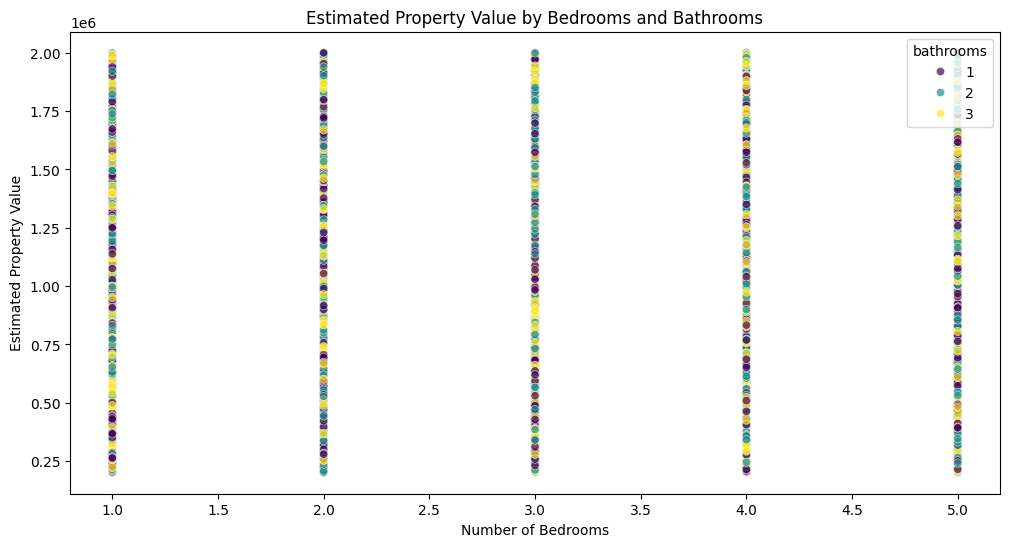

In [19]:
# Plotting estimated property value against the number of bedrooms and bathrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='bedrooms', y='estimated_value', hue='bathrooms', palette='viridis', alpha=0.7)
plt.title("Estimated Property Value by Bedrooms and Bathrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Estimated Property Value")
plt.colorbar(label='Bathrooms')
plt.show()

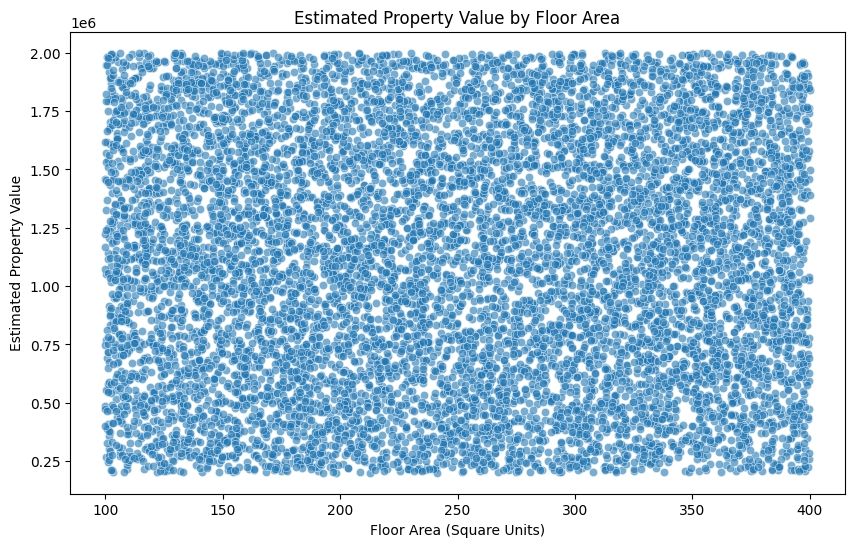

In [20]:
# Examining the relationship between floor area and estimated property value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='floor_area_num', y='estimated_value', alpha=0.6)
plt.title("Estimated Property Value by Floor Area")
plt.xlabel("Floor Area (Square Units)")
plt.ylabel("Estimated Property Value")
plt.show()